In [72]:
import numpy as np
import pandas as pd
from rplidar import RPLidar
import math
import matplotlib.pyplot as plt
from math import cos, sin, radians, pi
import time
from datetime import datetime
import getch

In [76]:
from rplidar import RPLidar
lidar = RPLidar('/dev/ttyUSB4')

info = lidar.get_info()
print(info)

health = lidar.get_health()
print(health)
all_points = np.empty(shape=(0,3))
for i, scan in enumerate(lidar.iter_scans()):
    print('%d: Got %d measurments' % (i, len(scan)))
    now_ts = datetime.now().timestamp()
    np_points= np.array(scan)
    np_points[:,0] = now_ts
    all_points= np.vstack((all_points, np_points))
    
#     char = getch.getch()
    if i > 100000:
        break

lidar.stop()
lidar.stop_motor()
lidar.disconnect()
np.save(f'2d_scan_ds_{datetime.now().strftime("%Y%m%d-%H%M%S")}.npy', all_points)


{'model': 40, 'firmware': (1, 28), 'hardware': 7, 'serialnumber': 'AAD199F6C9E59AD4C5E59CF756033414'}
('Good', 0)
0: Got 107 measurments
1: Got 156 measurments
2: Got 147 measurments
3: Got 142 measurments
4: Got 138 measurments
5: Got 133 measurments
6: Got 128 measurments
7: Got 118 measurments
8: Got 117 measurments
9: Got 116 measurments
10: Got 111 measurments
11: Got 104 measurments
12: Got 103 measurments
13: Got 98 measurments
14: Got 105 measurments
15: Got 104 measurments
16: Got 99 measurments
17: Got 95 measurments
18: Got 93 measurments
19: Got 98 measurments
20: Got 95 measurments
21: Got 98 measurments
22: Got 96 measurments
23: Got 97 measurments
24: Got 94 measurments
25: Got 94 measurments
26: Got 87 measurments
27: Got 90 measurments
28: Got 85 measurments
29: Got 89 measurments
30: Got 89 measurments
31: Got 88 measurments
32: Got 87 measurments
33: Got 87 measurments
34: Got 88 measurments
35: Got 90 measurments
36: Got 85 measurments
37: Got 82 measurments
38: Got

KeyboardInterrupt: 

In [77]:
np.save(f'2d_scan_ds_{datetime.now().strftime("%Y%m%d-%H%M%S")}.npy', all_points)

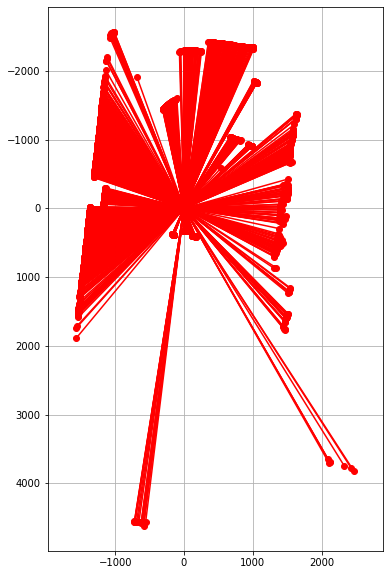

In [57]:
# np_points = np.empty(shape=(0,3))
# for item in scans:
#     np_points= np.vstack((np_points, np.array(item)))
                         
ox = np.sin(all_points[:,1]*np.pi/180) * all_points[:,2]
oy = np.cos(all_points[:,1]*np.pi/180) * all_points[:,2]
plt.figure(figsize=(6,10))
plt.plot([oy, np.zeros(np.size(oy))], [ox, np.zeros(np.size(oy))], "ro-") # lines from 0,0 to the 
plt.axis("equal")
bottom, top = plt.ylim()  # return the current ylim
plt.ylim((top, bottom)) # rescale y axis, to match the grid orientation
plt.grid(True)
plt.show()